In [4]:
#unpickling
import pickle

with open(r"C:\Users\bdala\Desktop\Face Detection CTTC\clean data\images.p",'rb') as f:
    images=pickle.load(f)

with open(r'C:\Users\bdala\Desktop\Face Detection CTTC\clean data\labels.p','rb') as f:
    labels=pickle.load(f)

In [5]:
print(images.shape)
print(labels.shape)

(296, 100, 100)
(296,)


In [6]:
set(labels)

{'jagu', 'jyoti', 'saswat'}

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [8]:
set(labels)

{0, 1, 2}

In [9]:
import numpy as np
a=len(set(labels))
print("Number of person:",a)
b=le.inverse_transform(np.arange(a))
for i in range(len(b)):
    print(i,"--->",b[i])

Number of person: 3
0 ---> jagu
1 ---> jyoti
2 ---> saswat


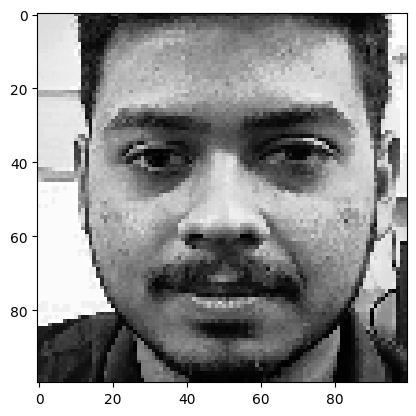

In [22]:
import matplotlib.pyplot as plt
plt.imshow(images[222],cmap='gray')
plt.show()

In [13]:
import cv2

In [14]:
def processing(img):
  img = cv2.equalizeHist(img)#it increase the contrast
  img = img.reshape(100,100,1)
  img=img/255
  return img

In [15]:
images = np.array(list(map(processing,images)))
print('Shape of input:',images.shape)

Shape of input: (296, 100, 100, 1)


In [16]:
from keras.utils import to_categorical
labels = to_categorical(labels)
print('Shape of output:',labels.shape)

Shape of output: (296, 3)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam

from keras.layers import Conv2D,MaxPooling2D,Flatten

In [18]:
def lenet_model():
  model=Sequential()
  #Convolutional layer and Relu layer
  model.add(Conv2D(30,(5,5),activation='relu',input_shape=(100,100,1)))
  #pooling layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten layer
  model.add(Flatten())

  #Hidden layer
  model.add(Dense(200,activation='relu'))

  #Output layer
  model.add(Dense(3,activation='softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [19]:
model=lenet_model()
print(model.summary())

C:\Users\bdala\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       1,587,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,592,648 (6.08 MB)

 Trainable params: 1,592,648 (6.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
model.fit(images,labels,validation_split=0.1,epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7009 - loss: 0.7866 - val_accuracy: 1.0000 - val_loss: 0.0569
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9965 - loss: 0.0295 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9979 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 5.2411e-04
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 3.0695e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 6.8409e-04 - val_accuracy: 1.0000 - val_loss: 1.6721e-04
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 5.6651e-05 - val_accuracy: 1.0000 - val_loss: 3.6409e-05
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.5275e-05 - val_accuracy: 1.0000 - val_loss: 1.9784e-05
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 2.4082e-05 - val_

In [21]:
model.save('final_model.h5')